In [3]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sqlalchemy
import psycopg2
from pandas import json_normalize
import datetime
import numpy as np

In [4]:
bitcoin_url = "http://api.coincap.io/v2/assets/bitcoin/history?interval=d1&start=1577833261000&end=1693522861000"
solana_url = url = "http://api.coincap.io/v2/assets/solana/history?interval=d1&start=1577833261000&end=1693522861000"
cardano_url = url = "http://api.coincap.io/v2/assets/cardano/history?interval=d1&start=1577833261000&end=1693522861000"
eth_url = "http://api.coincap.io/v2/assets/ethereum/history?interval=d1&start=1577833261000&end=1693522861000"
doge_url = "http://api.coincap.io/v2/assets/dogecoin/history?interval=d1&start=1577833261000&end=1693522861000"


In [5]:
bitcoin_data = requests.get(bitcoin_url).json()
sol_data = requests.get(solana_url).json()
cardano_data = requests.get(cardano_url).json()
eth_data = requests.get(eth_url).json()
doge_data = requests.get(doge_url).json()


In [6]:
bitcoin_df= json_normalize(bitcoin_data['data'])
sol_df= json_normalize(sol_data['data'])
cardano_df = json_normalize(cardano_data['data'])
eth_df= json_normalize(eth_data['data'])
doge_df= json_normalize(doge_data['data'])

In [7]:
bitcoin_df['coin'] = 'Bitcoin'
sol_df['coin'] = 'Solana'
cardano_df['coin'] = 'Cardano'
eth_df['coin'] = 'Ethereum'
doge_df['coin'] = 'Doge Coin'

In [8]:
main_df = pd.concat([bitcoin_df, sol_df, cardano_df, eth_df, doge_df], ignore_index=True)

In [9]:
main_df.set_index('coin', inplace=True)

In [44]:
main_df.head()

,priceUsd,date,month,year,Coin
coin,,,,,
Bitcoin,7273.89,2020-01-01,January,2020,Bitcoin
Bitcoin,7181.52,2020-01-02,January,2020,Bitcoin
Bitcoin,7244.75,2020-01-03,January,2020,Bitcoin
Bitcoin,7369.68,2020-01-04,January,2020,Bitcoin
Bitcoin,7487.73,2020-01-05,January,2020,Bitcoin


In [46]:
main_df.describe()

,priceUsd,year
count,6428.000000,6428.000000
mean,6280.878393,2021.414904
std,13433.033868,1.053010
min,0.000000,2020.000000
25%,0.260000,2021.000000
50%,29.350000,2021.000000
75%,2707.410000,2022.000000
max,67571.880000,2023.000000


In [12]:
main_df['priceUsd']= main_df['priceUsd'].astype('float')

In [13]:
main_df['priceUsd'] = round(main_df['priceUsd'],2)

In [14]:
# Time Series Data Processing.
# removes everything after the T
main_df['date'] = main_df['date'].str.replace(r'T.*','', regex=True)

In [15]:
main_df['time'] = main_df['time']/1000

In [16]:
main_df['time'] = pd.to_datetime(main_df['time'], unit='s')


In [17]:
# Create a new column for months

In [18]:
main_df['month'] = pd.DatetimeIndex(main_df.date).month
main_df['year'] = pd.DatetimeIndex(main_df.date).year

In [19]:
main_df.drop(columns = ['time'], inplace=True)

In [20]:
months_dict = {
    1: 'January', 2: 'February', 3: 'March',
    4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September',
    10: 'October', 11: 'November', 12: 'December'
}
main_df['month'] = main_df['month'].map(months_dict)

<h1>Data Analysis</h1>

<h3>This are the Questions to be answered by this Dataset</h3>

<p>In this notebook, we will analyze a dataset containing data for multiple cryptocurrencies. We will explore various aspects of these cryptocurrencies, including their prices, trading volumes, and trends.</p>

<p>- What was the Monthly Trading Volume of All Coins Throughout the Year?</p>
<p>- Which cryptocurrency had the highest price at any point during the dataset's timeframe?</p>
<p>- Which cryptocurrency had the lowest price at any point during the dataset's timeframe?</p>
<p>- What was the average daily trading volume for Bitcoin during the first quarter of 2023?</p>
<p>- Calculate the monthly average price for each cryptocurrency in the dataset.</p>
<p>- Identify the cryptocurrency with the highest percentage price increase from the beginning to the end of the dataset.</p>
<p>- Compare the volatility (price fluctuations) of different cryptocurrencies by calculating their standard deviations.</p>


### 1.1 Highest Price
- Which cryptocurrency had the highest price at any point during the dataset's timeframe?

In [21]:
highest_df = main_df
highest_df['Coin'] = highest_df.index

In [22]:
price_df = highest_df.groupby([highest_df['Coin'],highest_df['month'],highest_df['year']])['priceUsd'].sum()
price_df = price_df.reset_index()

In [23]:
main_df.sort_values(by='priceUsd').nlargest(5,'priceUsd')

,priceUsd,date,month,year,Coin
coin,,,,,
Bitcoin,67571.88,2021-11-09,November,2021,Bitcoin
Bitcoin,66938.47,2021-11-10,November,2021,Bitcoin
Bitcoin,65816.23,2021-11-08,November,2021,Bitcoin
Bitcoin,65188.25,2021-11-15,November,2021,Bitcoin
Bitcoin,65021.92,2021-11-11,November,2021,Bitcoin


### Monthly Trading Volume Of Coins Over The Years

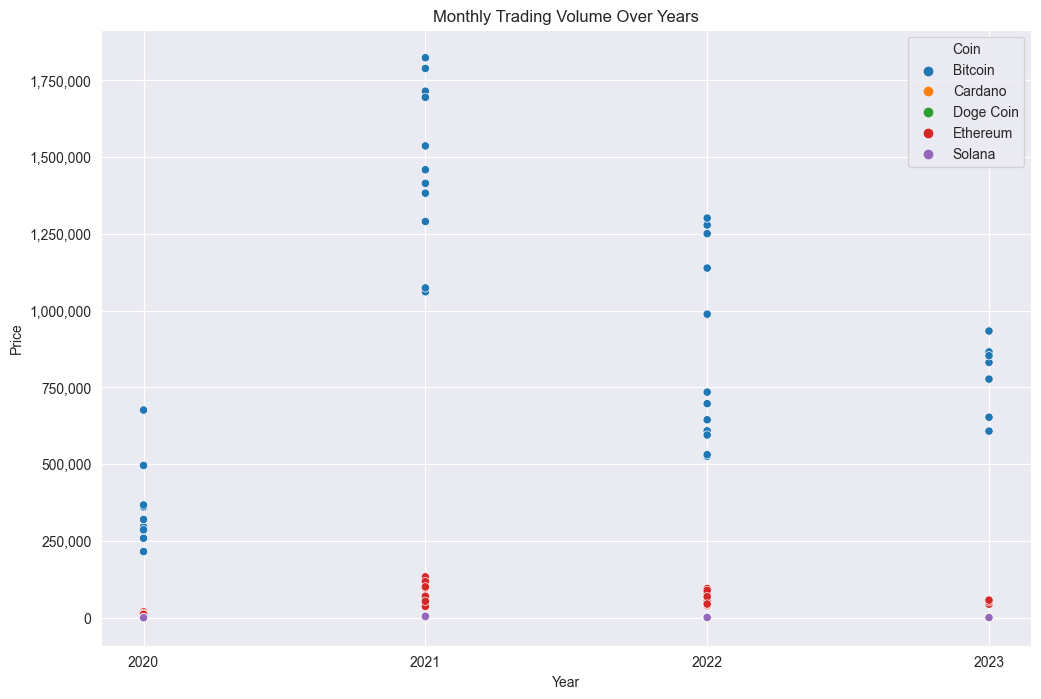

In [24]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.scatterplot(data=price_df,x='year',y='priceUsd',hue='Coin')
plt.title('Monthly Trading Volume Over Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks([2020, 2021, 2022, 2023], ['2020', '2021', '2022', '2023'])
# Access the current axis
ax = plt.gca()
# Use a custom y-axis label format to display full price values
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [25]:
price_df2 = highest_df

In [26]:
price_df2 = price_df2.reset_index()

([<matplotlib.axis.XTick at 0x149c4acbaf0>,
 [Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023')])

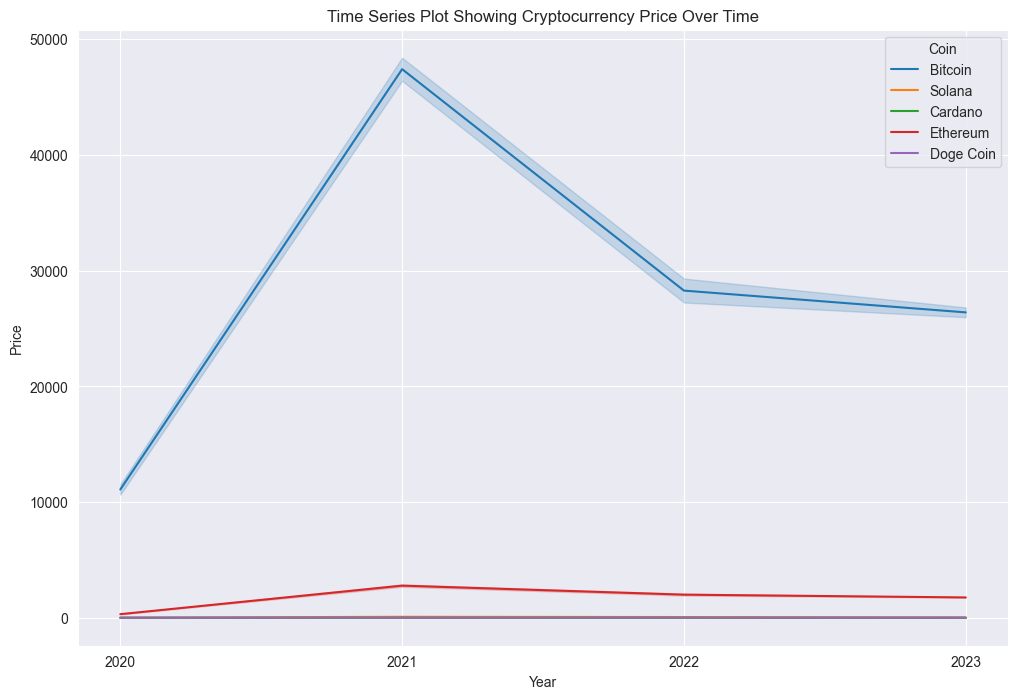

In [27]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.lineplot(data=price_df2,x='year',y='priceUsd',hue='Coin')
plt.title('Time Series Plot Showing Cryptocurrency Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks([2020, 2021, 2022, 2023], ['2020', '2021', '2022', '2023'])

### Which cryptocurrency had the lowest price at any point during the dataset's timeframe?

In [28]:
price_df.query('priceUsd != 0').sort_values(by='priceUsd').nsmallest(30,'priceUsd')

,Coin,month,year,priceUsd
104,Doge Coin,January,2021,0.39
44,Cardano,April,2020,1.09
71,Cardano,March,2020,1.11
59,Cardano,January,2020,1.27
100,Doge Coin,February,2021,1.57
75,Cardano,May,2020,1.64
116,Doge Coin,March,2021,1.70
55,Cardano,February,2020,1.73
131,Doge Coin,September,2022,1.81
114,Doge Coin,June,2023,1.96


### What was the average monthly trading volume for Bitcoin?

In [29]:
bitcoin_volume = price_df.query("Coin == 'Bitcoin'")

### We find the Average Trading volume by adding up all prices and dividing them by the number of months

In [30]:
bitcoin_volume['priceUsd'].sum() / 44

864586.2272727274

### Calculate the monthly average price for each cryptocurrency in the dataset.

In [31]:
# create the dataframe by calculating the monthly average price of every coin
average_df = main_df.groupby(['month','year','Coin'])['priceUsd'].mean().reset_index()


In [32]:
# create a new column for both the months and the year
average_df['formatted_date'] = average_df.apply(lambda row: f"{row['month']} {row['year']}", axis=1)
# create a dictionary to map and sort the months
monthnum = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
# arrange the months in the df
average_df['Months_Num'] = average_df['month'].map(monthnum)
average_df.sort_values(by=['year', 'Months_Num'], inplace=True)

<Axes: title={'center': 'Time Series Plot Showing Monthly Average of Cryptocurrency Price Over Time'}, xlabel='Year', ylabel='Price'>

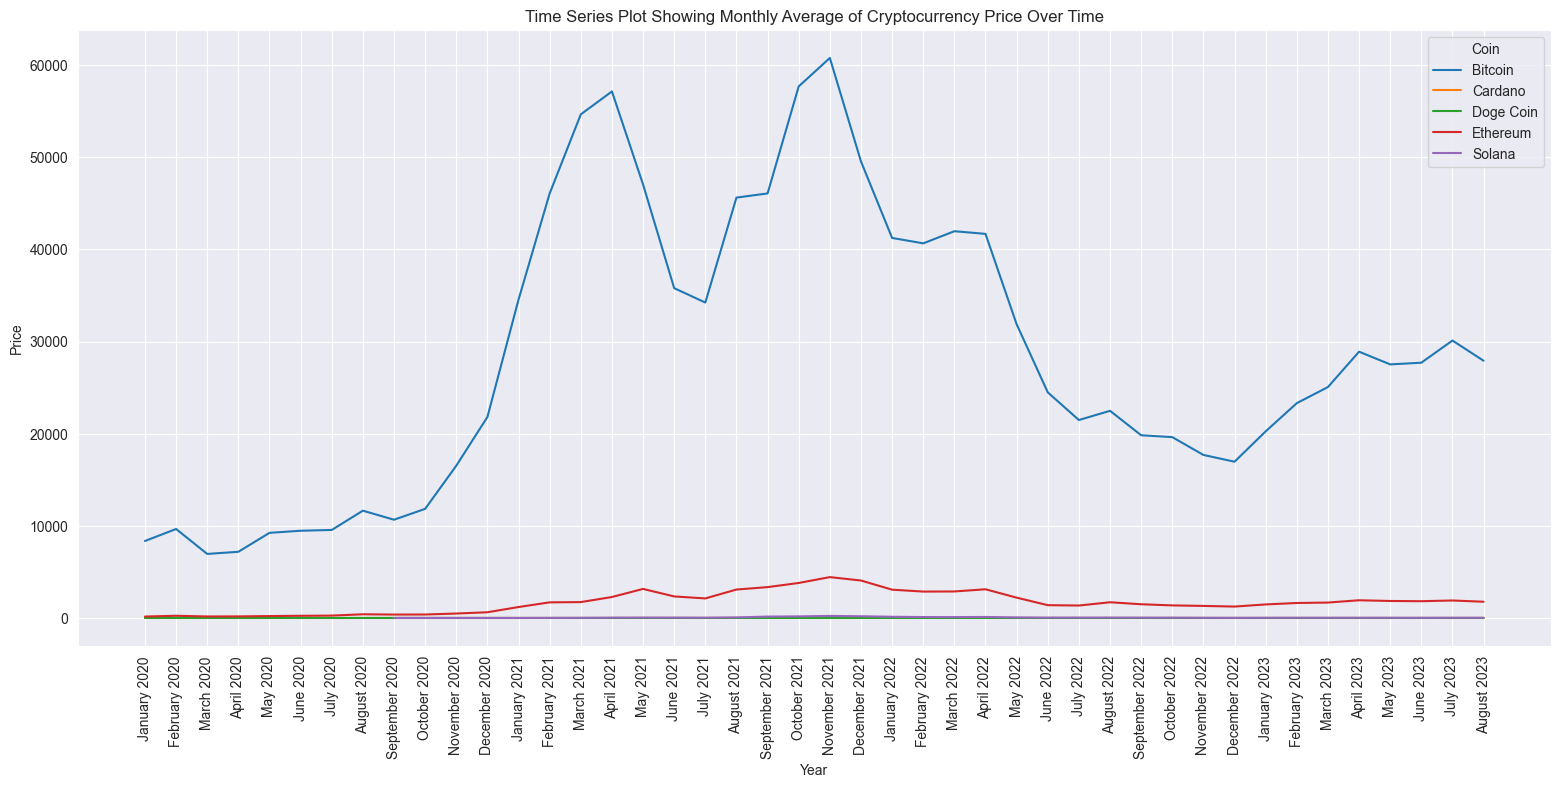

In [33]:
plt.figure(figsize=(19,8))
sns.set_style('darkgrid')
plt.xticks(rotation ='vertical')
plt.title('Time Series Plot Showing Monthly Average of Cryptocurrency Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
sns.lineplot(data=average_df, x='formatted_date', y='priceUsd', hue='Coin')

### Identify the cryptocurrency with the highest percentage price increase from the beginning to the end of the dataset.

In [34]:
def calculate_increase(group):
    first_price = group.iloc[0]['priceUsd']
    last_price = group.iloc[-1]['priceUsd']
    return ((last_price - first_price) / first_price) * 100

In [35]:
percentage_df = main_df.groupby('Coin').apply(calculate_increase).reset_index()

C:\Users\BellaRosa\AppData\Local\Temp\ipykernel_13480\537060324.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  return ((last_price - first_price) / first_price) * 100


In [36]:
percentage_df.columns = ['Coin', 'Percentage_Increase']


<Axes: title={'center': 'Bar Plot Showing Percentage Increase of Cryptocurrency Price Over Time'}, xlabel='Percentage_Increase', ylabel='Coin'>

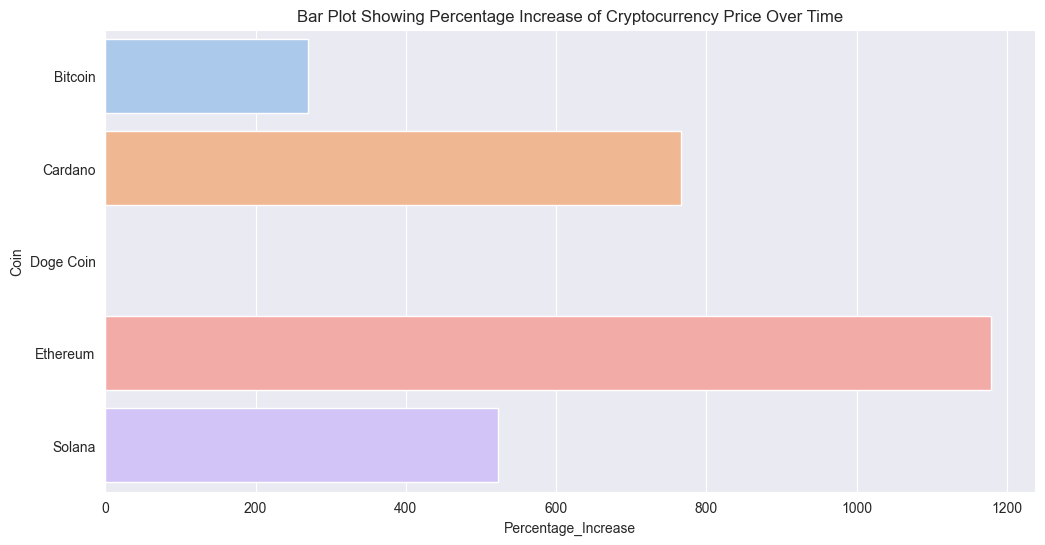

In [37]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Bar Plot Showing Percentage Increase of Cryptocurrency Price Over Time')
sns.barplot(data=percentage_df, x='Percentage_Increase', y='Coin', palette='pastel')

###  Compare the volatility (price fluctuations) of different cryptocurrencies by calculating their standard deviations.

In [38]:
doge_std = main_df.query("Coin == 'Doge Coin'")
bitcoin_std = main_df.query("Coin == 'Bitcoin'")
cardano_std = main_df.query("Coin == 'Cardano'")
eth_std = main_df.query("Coin == 'Ethereum'")
sol_std = main_df.query("Coin == 'Solana'")

In [39]:
doge_std = np.std(doge_std['priceUsd'])
bitcoin_std = np.std(bitcoin_std['priceUsd'])
cardano_std = np.std(cardano_std['priceUsd'])
eth_std = np.std(eth_std['priceUsd'])
sol_std = np.std(sol_std['priceUsd'])

In [40]:
std_data = {
    'Coin': ['Doge', 'Bitcoin', 'Cardano', 'Ethereum', 'Solana'],
    'Standard Deviation': [doge_std, bitcoin_std, cardano_std, eth_std, sol_std]
}

In [41]:
dev_df = pd.DataFrame(std_data)

<Axes: xlabel='Coin', ylabel='Standard Deviation'>

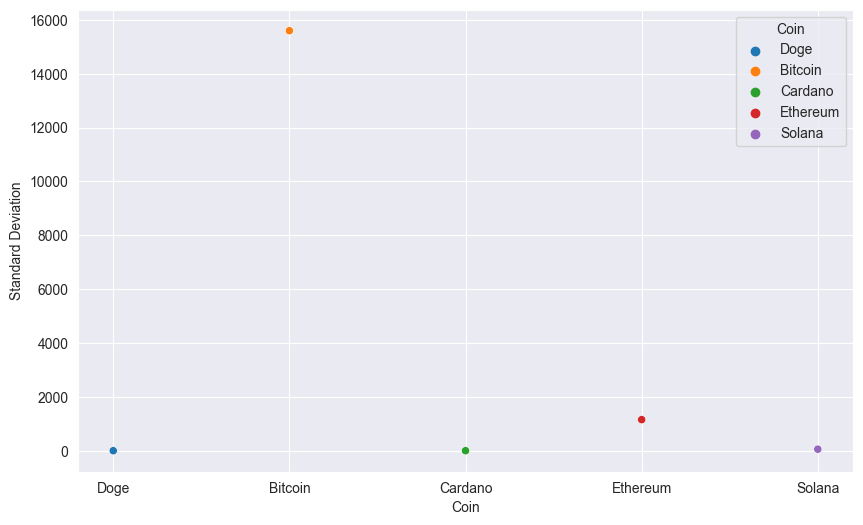

In [42]:
plt.figure(figsize=(10, 6))
# y_positions = [0.102372, 15596.888694, 0.657199, 1154.935528, 57.153674]  # Positions corresponding to each cryptocurrency
sns.scatterplot(data=dev_df, y='Standard Deviation', x='Coin',hue='Coin')
